# 차원 축소(Demensionality reduction)
- 모델 단순화(해석을 용이하게 하기 위해)
- 학습 시간 단축
- 차원의 저주(Curse of Dimensionality) 회피
- 과적합(Overfitting) 줄임

### 피처 선택(Feature selection), 피처 추출(Feature extraction)의 단계를 거침
- 피처 추출 시 사용하는 기법
    - PCA
    - LDA
    - SVD
    - NMF

# PCA(Principal Component Analysis)
- 주성분(Principal Component) 추출 => 차원 축소
- 정보 유실 최소화
- 분산(variance)이 큰 축(데이터 특성을 잘 나타내는 축)을 찾고 분산이 작은 축을 제거

In [6]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['target'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


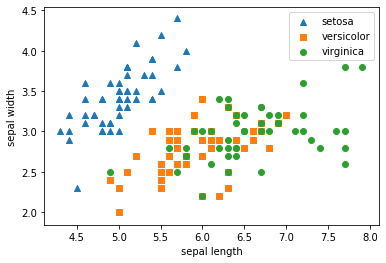

In [7]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = df[df['target'] == i]['sepal_length']
    y_data = df[df['target'] == i]['sepal_width']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### 각 feature data 값들을 동일한 스케일로 변환 필요 - StandardScaler 사용

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


### 2차원으로 축소

In [9]:
df_pca = pd.DataFrame(iris_pca, columns=['component1', 'component2'])
df_pca['target'] = iris.target
df_pca.head()

,component1,component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


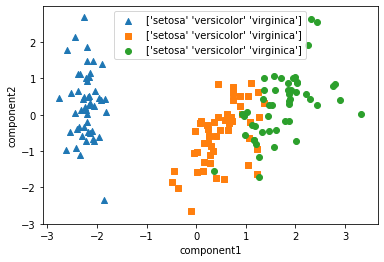

In [10]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = df_pca[df_pca['target'] == i]['component1']
    y_data = df_pca[df_pca['target'] == i]['component2']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names)

plt.legend()
plt.xlabel('component1')
plt.ylabel('component2')
plt.show()

### 변동성 비율: 두 원소의 합은 원본 데이터의 변동성의 비율을 의미
- 현재 데이터는 원소의 합이 0.95873207으로 원본 데이터의 변동성 약 95%

In [11]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


### PCA를 사용하여 분류(Classification)를 해보자

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np 

rf = RandomForestClassifier()
scores = cross_val_score(rf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.98039216 0.92156863 0.97916667]
0.960375816993464


In [14]:
pca_X = df_pca[['component1', 'component2']]
scores = cross_val_score(rf, pca_X, iris.target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.8627451  0.84313725 0.95833333]
0.8880718954248367


### 차원을 축소하다보니까 확실히 정보가 어느정도는 유실되고 이것이 정확도의 감소를 일으키기는 한다